# Anemia Prediction

In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
#importing the dataset
df = pd.read_csv("cleaned_SANHANES 15_17.csv")
df.head()

,province,famhist_HighBP,weight_perception,weighloss_attempt_pastyear,weightgain_attempt_pastyear,geotype,SBPfinal,DBPfinal,AGEfinal,Sex,...,redmeat,CategoricalFatScore,physical_activity,Healthcare_access2yr,dwell_typ,medaid,WHratio_high,agric_animal,agric_crop,Hunger_cat
0,6.0,1.831547,2.030113,1.909590,1.929934,1.0,124.0,66.0,15.0,1.0,...,1.090504,1.645162,1.708182,1.731773,1.219265,1.880085,2.0,1.963210,1.791531,1.975901
1,7.0,1.839813,2.008815,1.924067,1.879429,1.0,110.0,55.0,15.0,2.0,...,1.051730,1.441171,1.815415,1.689895,1.110846,1.849625,1.0,1.944111,1.818131,2.083894
2,8.0,1.831111,2.290645,1.888857,2.074111,1.0,116.0,67.0,15.0,2.0,...,1.087663,1.322446,1.735036,1.716649,1.000000,2.000000,1.0,2.000000,2.000000,1.000000
3,2.0,1.833285,1.962484,1.922102,1.873570,2.0,112.0,59.0,15.0,2.0,...,1.072962,1.602108,1.739641,1.717941,1.204326,1.911365,2.0,1.957654,1.797466,2.044821
4,5.0,1.837062,2.033020,1.912650,1.886791,3.0,129.0,71.0,15.0,2.0,...,1.055649,1.674221,1.707897,1.675004,2.000000,2.000000,2.0,1.950410,1.823383,3.000000


In [3]:
#checking the dimension of the dataset
df.shape

(493, 43)

In [4]:
df.columns

Index(['province', 'famhist_HighBP', 'weight_perception',
       'weighloss_attempt_pastyear', 'weightgain_attempt_pastyear', 'geotype',
       'SBPfinal', 'DBPfinal', 'AGEfinal', 'Sex', 'foodexpense',
       'familymembhungry_pastyear', 'distance_clinic', 'HHlivingcost', 'VitA',
       'ferritin_res_edited', 'platelet_count_res1', 'hh_incomecat', 'bmi',
       'sugarscore_cat', 'fruitscore_cat', 'NutriKnowA_cat', 'WHODASscore',
       'HDL', 'mcv_res', 'aindex_cat', 'HbA1c', 'anemia_bin', 'Race', 'DDScat',
       'Psych_dist2', 'Cursmoker', 'leafyveg', 'redmeat',
       'CategoricalFatScore', 'physical_activity', 'Healthcare_access2yr',
       'dwell_typ', 'medaid', 'WHratio_high', 'agric_animal', 'agric_crop',
       'Hunger_cat'],
      dtype='object')

In [5]:
#checking the columns of the dataset
col = df.columns
col

Index(['province', 'famhist_HighBP', 'weight_perception',
       'weighloss_attempt_pastyear', 'weightgain_attempt_pastyear', 'geotype',
       'SBPfinal', 'DBPfinal', 'AGEfinal', 'Sex', 'foodexpense',
       'familymembhungry_pastyear', 'distance_clinic', 'HHlivingcost', 'VitA',
       'ferritin_res_edited', 'platelet_count_res1', 'hh_incomecat', 'bmi',
       'sugarscore_cat', 'fruitscore_cat', 'NutriKnowA_cat', 'WHODASscore',
       'HDL', 'mcv_res', 'aindex_cat', 'HbA1c', 'anemia_bin', 'Race', 'DDScat',
       'Psych_dist2', 'Cursmoker', 'leafyveg', 'redmeat',
       'CategoricalFatScore', 'physical_activity', 'Healthcare_access2yr',
       'dwell_typ', 'medaid', 'WHratio_high', 'agric_animal', 'agric_crop',
       'Hunger_cat'],
      dtype='object')

In [6]:
#statistical information about the dataset
df.describe()

,province,famhist_HighBP,weight_perception,weighloss_attempt_pastyear,weightgain_attempt_pastyear,geotype,SBPfinal,DBPfinal,AGEfinal,Sex,...,redmeat,CategoricalFatScore,physical_activity,Healthcare_access2yr,dwell_typ,medaid,WHratio_high,agric_animal,agric_crop,Hunger_cat
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,...,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,4.551724,1.840045,1.954297,1.926952,1.863240,2.182556,116.683860,64.948564,15.963489,1.535497,...,1.057515,1.602270,1.753041,1.685717,1.216267,1.911186,1.903814,1.946120,1.818645,1.999897
std,2.624126,0.472084,0.421755,0.245559,0.325048,1.141930,11.742552,8.540304,0.861723,0.499245,...,0.219036,0.458751,0.408785,0.438701,0.391098,0.272663,0.288305,0.214875,0.367110,0.834033
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,86.000000,45.000000,15.000000,1.000000,...,0.965461,1.000000,1.000000,1.000000,0.910187,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.839973,2.000000,2.000000,2.000000,1.000000,109.000000,59.000000,15.000000,1.000000,...,1.000000,1.000000,1.711894,1.000000,1.000000,2.000000,2.000000,2.000000,1.840432,1.000000
50%,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,116.160968,64.402764,16.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,7.000000,2.000000,2.000000,2.000000,2.000000,3.000000,123.000000,71.000000,17.000000,2.000000,...,1.000000,2.000000,2.000000,2.000000,1.208096,2.000000,2.000000,2.000000,2.000000,3.000000
max,9.000000,3.000000,4.000000,2.000000,2.074111,4.000000,180.000000,102.000000,17.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.047973,2.225675,2.000000,2.000000,3.000000


In [7]:
#general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 493 entries, 0 to 492
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   province                     493 non-null    float64
 1   famhist_HighBP               493 non-null    float64
 2   weight_perception            493 non-null    float64
 3   weighloss_attempt_pastyear   493 non-null    float64
 4   weightgain_attempt_pastyear  493 non-null    float64
 5   geotype                      493 non-null    float64
 6   SBPfinal                     493 non-null    float64
 7   DBPfinal                     493 non-null    float64
 8   AGEfinal                     493 non-null    float64
 9   Sex                          493 non-null    float64
 10  foodexpense                  493 non-null    float64
 11  familymembhungry_pastyear    493 non-null    float64
 12  distance_clinic              493 non-null    float64
 13  HHlivingcost        

In [8]:
#checking for null values
df.isna().sum()

province                       0
famhist_HighBP                 0
weight_perception              0
weighloss_attempt_pastyear     0
weightgain_attempt_pastyear    0
geotype                        0
SBPfinal                       0
DBPfinal                       0
AGEfinal                       0
Sex                            0
foodexpense                    0
familymembhungry_pastyear      0
distance_clinic                0
HHlivingcost                   0
VitA                           0
ferritin_res_edited            0
platelet_count_res1            0
hh_incomecat                   0
bmi                            0
sugarscore_cat                 0
fruitscore_cat                 0
NutriKnowA_cat                 0
WHODASscore                    0
HDL                            0
mcv_res                        0
aindex_cat                     0
HbA1c                          0
anemia_bin                     0
Race                           0
DDScat                         0
Psych_dist

In [9]:
#to check for duplicates
df.duplicated().sum()

0

Histogram for the features

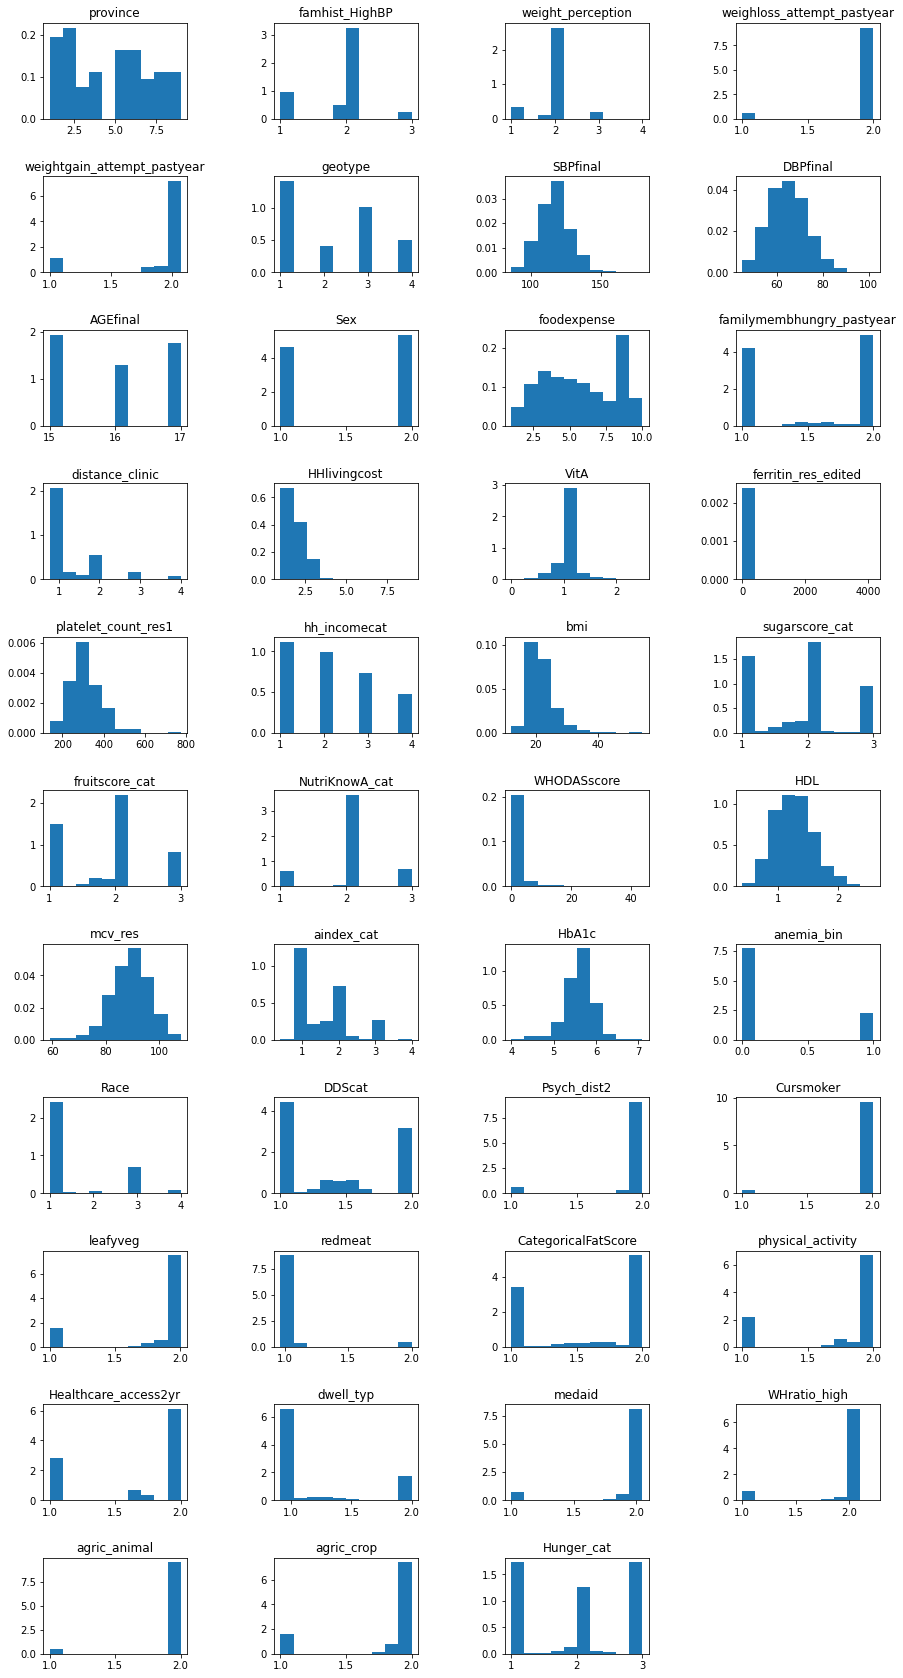

In [10]:
# Create the figure and subplots
fig, axs = plt.subplots(11, 4, figsize=(15, 30))

# Flatten the axs array to make it easier to iterate through
axs = axs.flatten()

# Loop through each feature and plot a histogram in a separate subplot
for i, col in enumerate(df.columns):
    axs[i].hist(df[col], density = True, bins=10)
    axs[i].set_title(col)

# Hide any unused subplots
for i in range(len(df.columns), 11 * 4):
    axs[i].axis('off')

# Add a main title and adjust the spacing between subplots
#plt.suptitle('Histograms for Multiple Features')
plt.subplots_adjust(hspace=0.6, wspace=0.6)
#fig.suptitle("Histogram for the features", fontsize = 30)

# Show the plot
plt.show()

In [11]:
# From the histogram above, few of the features are normally distributed

In [12]:
#Value counts for some of the categorical variables
feat = ["geotype", "Sex", "hh_incomecat", "province", "AGEfinal", "anemia_bin"]
for i in feat:
    print("*" * 50)
    print(df[i].value_counts().sort_values())

**************************************************
2.0     60
4.0     75
3.0    149
1.0    209
Name: geotype, dtype: int64
**************************************************
1.0    229
2.0    264
Name: Sex, dtype: int64
**************************************************
4.0     71
3.0    109
2.0    147
1.0    166
Name: hh_incomecat, dtype: int64
**************************************************
3.0    30
7.0    38
8.0    44
9.0    44
4.0    44
6.0    65
5.0    65
1.0    77
2.0    86
Name: province, dtype: int64
**************************************************
16.0    127
17.0    174
15.0    192
Name: AGEfinal, dtype: int64
**************************************************
1.0    113
0.0    380
Name: anemia_bin, dtype: int64


In [13]:
#distribution of the dataset
df["Sex"].value_counts()

2.0    264
1.0    229
Name: Sex, dtype: int64

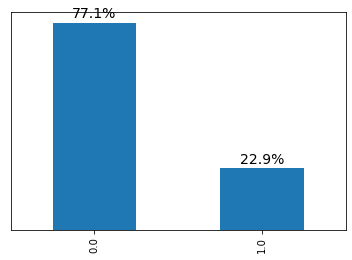

In [14]:
#To check our target variable

ax = df["anemia_bin"].value_counts(normalize=True).mul(100).plot.bar()
for p in ax.patches:
    y = p.get_height()
    x = p.get_x() + p.get_width() / 2

    # Label of bar height
    label = "{:.1f}%".format(y)

    # Annotate plot
    ax.annotate(label, xy=(x, y), xytext=(0, 5), textcoords="offset points", ha="center", fontsize=14)

# Remove y axis
ax.get_yaxis().set_visible(False)

We can see clearly that we have an imbalanced dataset which indicates that 77.1% of the population don't have anemia and 22.9% has anemia

**************************************************
anemia_bin  0.0  1.0
geotype             
1.0         162   47
2.0          45   15
3.0         115   34
4.0          58   17
**************************************************
anemia_bin  0.0  1.0
Sex                 
1.0         187   42
2.0         193   71
**************************************************
anemia_bin    0.0  1.0
hh_incomecat          
1.0           121   45
2.0           119   28
3.0            92   17
4.0            48   23
**************************************************
anemia_bin  0.0  1.0
province            
1.0          65   12
2.0          68   18
3.0          27    3
4.0          37    7
5.0          44   21
6.0          49   16
7.0          27   11
8.0          31   13
9.0          32   12
**************************************************
anemia_bin  0.0  1.0
AGEfinal            
15.0        134   58
16.0         98   29
17.0        148   26


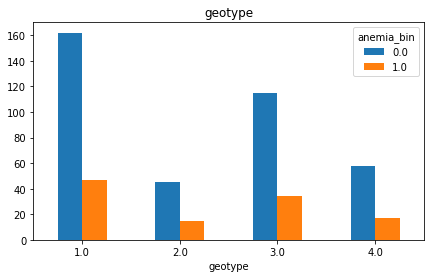

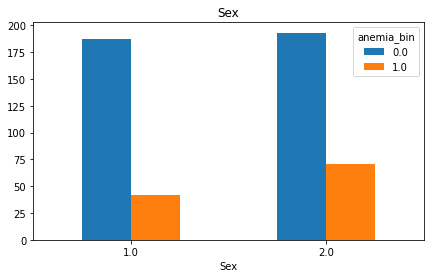

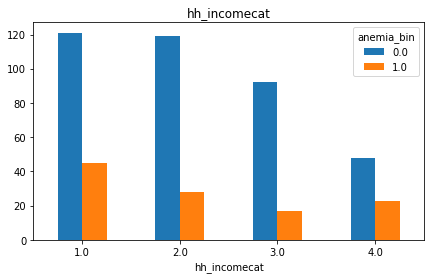

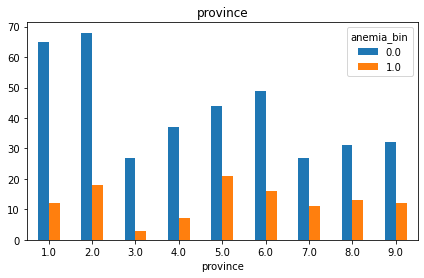

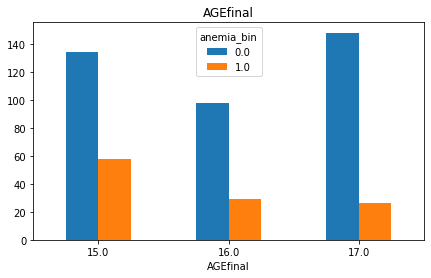

In [15]:
# Cross tabulation between some categorical variables and the target variable (anemia_bin)
feat = ["geotype", "Sex", "hh_incomecat", "province", "AGEfinal"]
for i in feat:
    CrosstabResult = pd.crosstab(index=df[i],columns=df['anemia_bin'])
    print('*' * 50)
    print(CrosstabResult)
    CrosstabResult.plot.bar(figsize=(7,4), rot=0)
    plt.title(i)

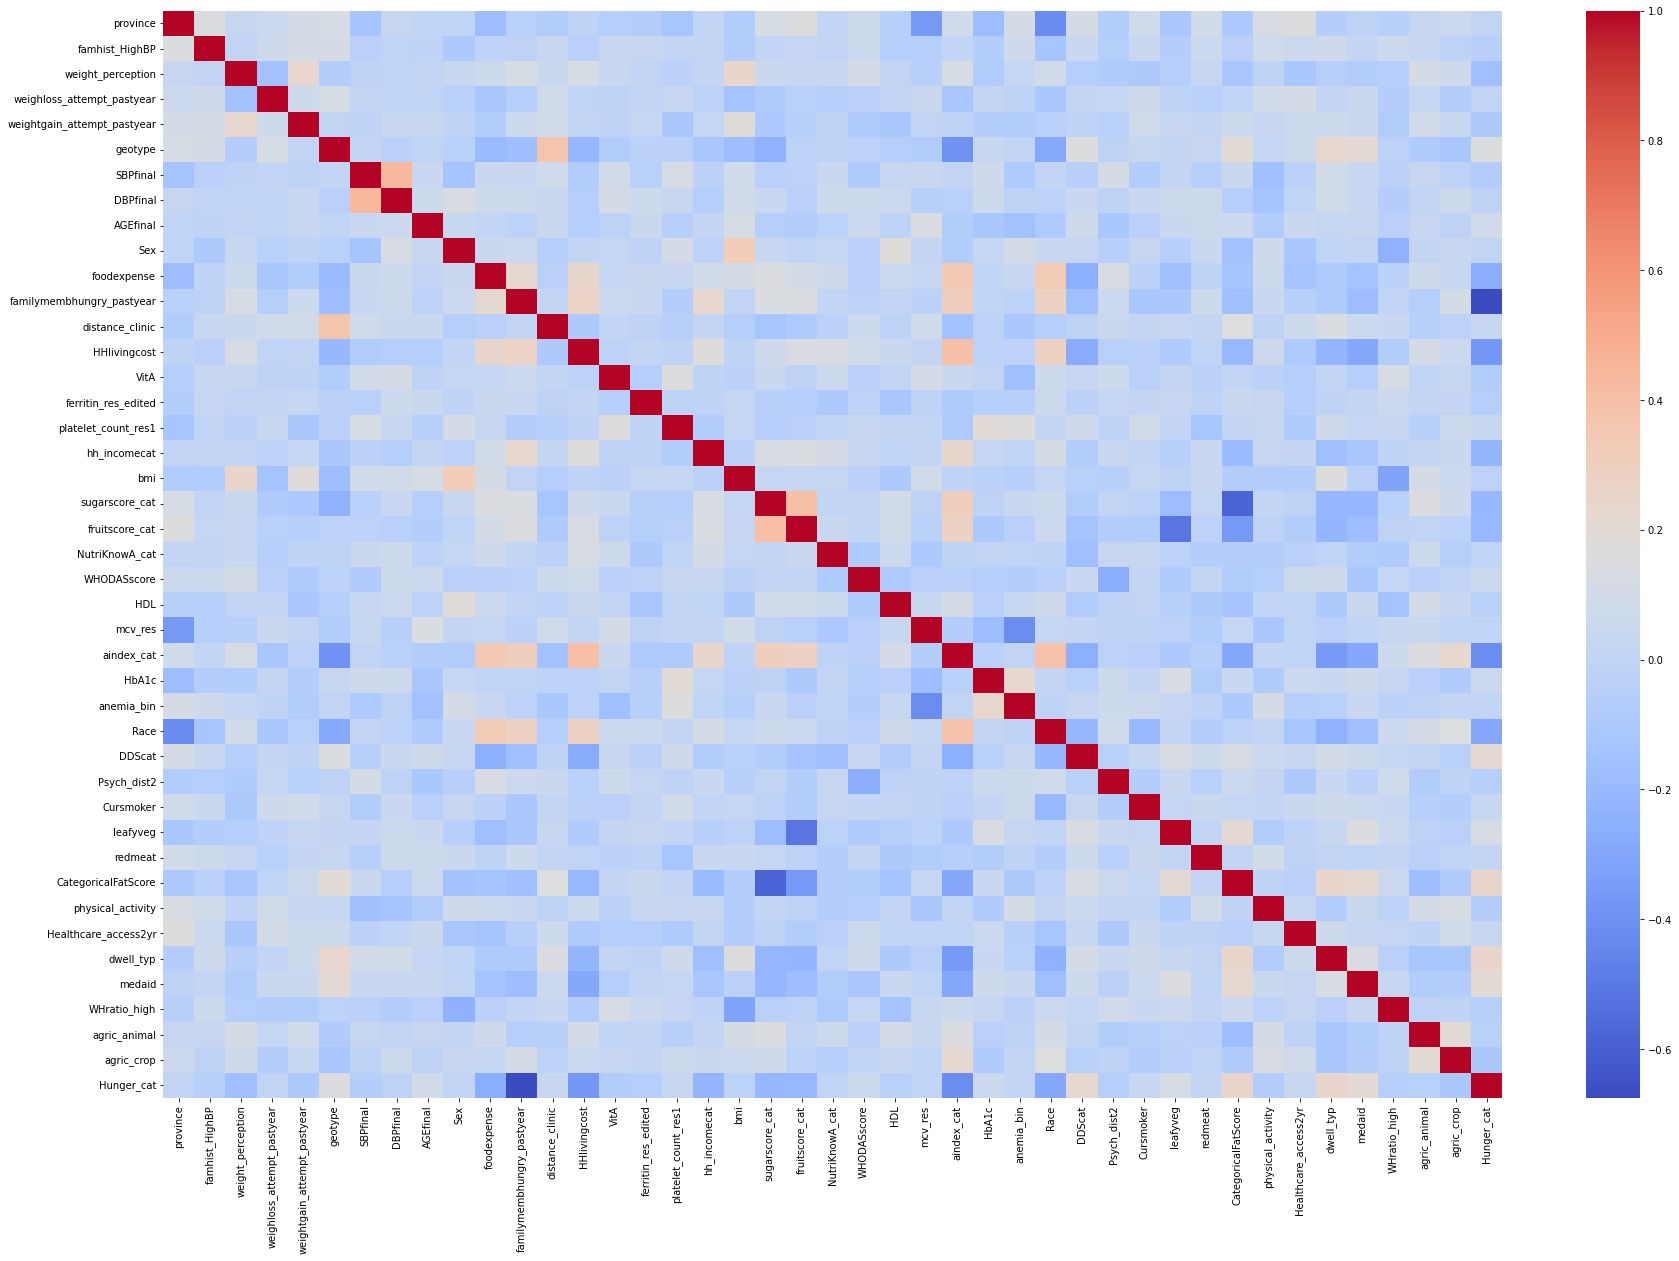

In [16]:
#Correlation heatmap between the variables
corr = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, cmap="coolwarm")
plt.show()

From the heatmap we don't really have highly correlated features

In [17]:
# Calculate the correlation matrix
corr_matrix = df.corr().unstack().sort_values().drop_duplicates()
# Display the correlation matrix
print(corr_matrix)

Hunger_cat      familymembhungry_pastyear   -0.675101
sugarscore_cat  CategoricalFatScore         -0.579685
leafyveg        fruitscore_cat              -0.515998
province        Race                        -0.421223
aindex_cat      Hunger_cat                  -0.417984
                                               ...   
Race            aindex_cat                   0.388023
aindex_cat      HHlivingcost                 0.401325
sugarscore_cat  fruitscore_cat               0.401878
DBPfinal        SBPfinal                     0.434492
province        province                     1.000000
Length: 904, dtype: float64


<AxesSubplot:>

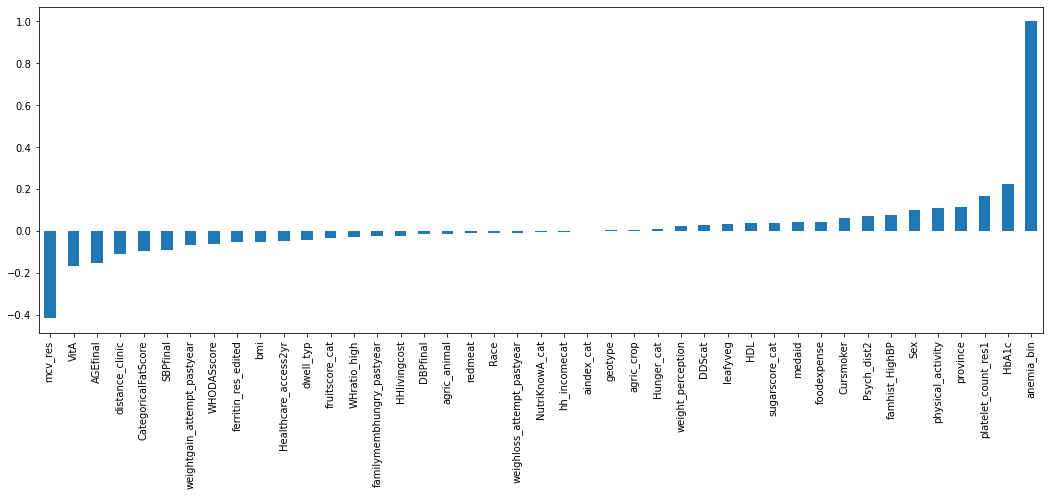

In [18]:
#Let's find the correlation between the independent and the dependent feature
df.corr()['anemia_bin'].sort_values().plot(kind='bar', figsize=(18, 6))

# Modelling

In [19]:
#splitting our dataset into dependent and independent variable
X = df.drop(["anemia_bin"], axis=1) #independent
y = df.anemia_bin #dependent

In [20]:
#Importing necessary libraries for Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

Stratified K-FOLD Cross Validation Technique was implemented with 15 folds

In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score
from sklearn.preprocessing import StandardScaler
k = 15
#15 folds, 150 for n_estimators im extratrees
# Create the StratifiedKFold object
skf = StratifiedKFold(n_splits=k, shuffle = True, random_state = 42)

# Iterate over each fold
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

    
    scaler=StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

In [22]:
Store_models = [("ExtraTreesClassifier", ExtraTreesClassifier(random_state = 123, n_estimators = 150, criterion = "entropy")),#(criterion = 'entropy', max_depth = 8, max_features = 'log2', min_samples_leaf = 1, n_estimators = 150, random_state = 123)),
              ("Logistic Regression", LogisticRegression(random_state=123)), 
              ("Support Vector Machines", SVC(random_state=123, probability = True)), #(,gamma=1, C = 100,probability = True)),
              ("Gaussian Naive Bayes", GaussianNB()),
              ("Bernoulli Naive Bayes", BernoulliNB()),
              ("KNN", KNeighborsClassifier()),
              ("Decision Tree", DecisionTreeClassifier(random_state=123)),
              ("Bagging Classifier", BaggingClassifier(random_state=123)), #base_estimator=RandomForestClassifier))) #n_estimators = 250)
              ("Adaboost Classifier", AdaBoostClassifier()), #base_estimator=DecisionTreeClassifier(),#random_state = 101,n_estimators =150 )),
              ("Gradient Boosting", GradientBoostingClassifier(random_state = 123)),
              ("CatBoostClassifier", CatBoostClassifier(random_state = 123, silent=True))] #,n_estimators = 250))] 

In [23]:
Store_model_results = pd.DataFrame(columns=["Model", "Accuracy Score"])

In [25]:
#Fitting and evaluating the models
from tqdm import tqdm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score, ConfusionMatrixDisplay
from sklearn.metrics import matthews_corrcoef

for clf_name, clf in tqdm(Store_models):
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    
    score = accuracy_score(y_test, predictions)
    ypred_prob = clf.predict_proba(X_test)[:, 1]
    rocAuc_score = roc_auc_score(y_test, ypred_prob)
    mcc = matthews_corrcoef(y_test, predictions)
    bal_acc = balanced_accuracy_score(y_test, predictions)
    acc = accuracy_score(y_test, predictions)
    kappa = cohen_kappa_score(y_test, predictions)
    #f1_score = f1_score(y_test, predictions, average='binary')
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    
    # print("*"*50)
   # print(clf_name)
    #print('Confusion Matrix : \n', cm1)
    
    #sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
    #print('Sensitivity : ', sensitivity)

    #specificity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    #print('Specificity : ', specificity)

    new_row = {"Model": clf_name, "Accuracy Score": score, 'Roc_Auc_score':rocAuc_score, "MCC":mcc, 
               "Balanced_Acc":bal_acc, "Cohen_Kappa": kappa, "Precision": precision,
              "Recall":recall} #, "Sensitivity": sensitivity, "Specificity": specificity}
    Store_model_results = Store_model_results.append(new_row, ignore_index=True)
#"F1_Score": f1_score,

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:03<00:00,  2.87it/s]


In [27]:
Store_model_results.sort_values(by="MCC", ascending=False)

,Model,Accuracy Score,Balanced_Acc,Cohen_Kappa,MCC,Precision,Recall,Roc_Auc_score
0,ExtraTreesClassifier,0.9375,0.857143,0.796178,0.813250,1.000000,0.714286,0.902857
10,CatBoostClassifier,0.90625,0.785714,0.675676,0.714286,1.000000,0.571429,0.897143
2,Support Vector Machines,0.875,0.714286,0.539568,0.607831,1.000000,0.428571,0.885714
9,Gradient Boosting,0.875,0.765714,0.592357,0.605058,0.800000,0.571429,0.937143
8,Adaboost Classifier,0.84375,0.745714,0.518072,0.520496,0.666667,0.571429,0.914286
1,Logistic Regression,0.8125,0.725714,0.451429,0.451429,0.571429,0.571429,0.868571
7,Bagging Classifier,0.8125,0.622857,0.309353,0.348490,0.666667,0.285714,0.902857
6,Decision Tree,0.75,0.685714,0.336788,0.341515,0.444444,0.571429,0.685714
5,KNN,0.8125,0.571429,0.206612,0.339422,1.000000,0.142857,0.760000
3,Gaussian Naive Bayes,0.5625,0.668571,0.208481,0.283782,0.315789,0.857143,0.822857


Interpretation from the evaluation metrics performance

1. ExtraTreesClassifier has the highest accuracy score while the Gaussian Naive Bayes has the lowest
2. ExtraTreesClassifier also has the highest balanced accuracy score while the Bernoulli Naive Bayes has the lowest
3. ExtraTreesClassifier has the highest Cohen Kappa score while the Bernoulli Naive Bayes has the lowest
4. ExtraTreesClassifier has the highest MCC while the Bernoulli Naive Bayes has the lowest
5. ExtraTreesClassifier, Support Vector Machines, KNN and CatBoostClassifier  has a precision value of 1 while the Gaussian    Naive Bayes has the lowest
6. Gaussian Naive Bayes has the highest Recall value while the KNN has the lowest
7. Gradient Boosting has the highest Roc_Auc_score while the Decision Tree  has the lowest

In [ ]:
#from sklearn.model_selection import GridSearchCV
#parameters = {'n_estimators': [50, 100, 150], 'max_features': ['sqrt', 'log2'], 
 #             'criterion': ['gini', 'entropy'], 'max_depth': [1, 2, 5, 8],
  #           'min_samples_leaf': [1, 2, 5, 8]}
#grid_search = GridSearchCV(ExtraTreesClassifier(), parameters)
#grid_search.fit(X_train, y_train)

#print("Best hyperparameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)

# Feature Importance of the Top 2 Models using the MCC evaluation metrics

ExtraTrees Classifier

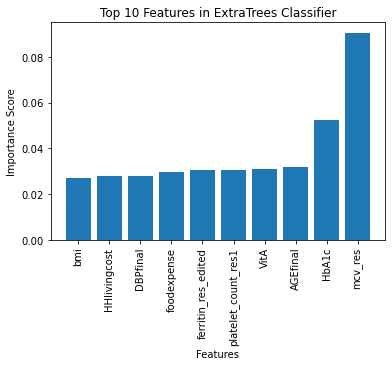

In [28]:
# Building the model
extra = ExtraTreesClassifier(random_state = 123, n_estimators = 150, criterion = "entropy")
# Training the model
extra.fit(X_train, y_train)

# get feature importance scores from the trained model
importances = extra.feature_importances_

# get the top 10 features with the highest importance scores
indices = np.argsort(importances)[-10:]

col = X.columns.tolist()
#feat_imp = pd.DataFrame(columns = ["Features", "Importance"]) #for i,j in enumerate(importances):
#new_row = {"Features": X.columns, "Importance":importances} #print(f'{col[i]} : {j}'))
#feat_imp = feat_imp.append(new_row, ignore_index=True)
#print(feat_imp)
# plot the feature importance scores in a bar chart
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.title("Top 10 Features in ExtraTrees Classifier")
plt.show()



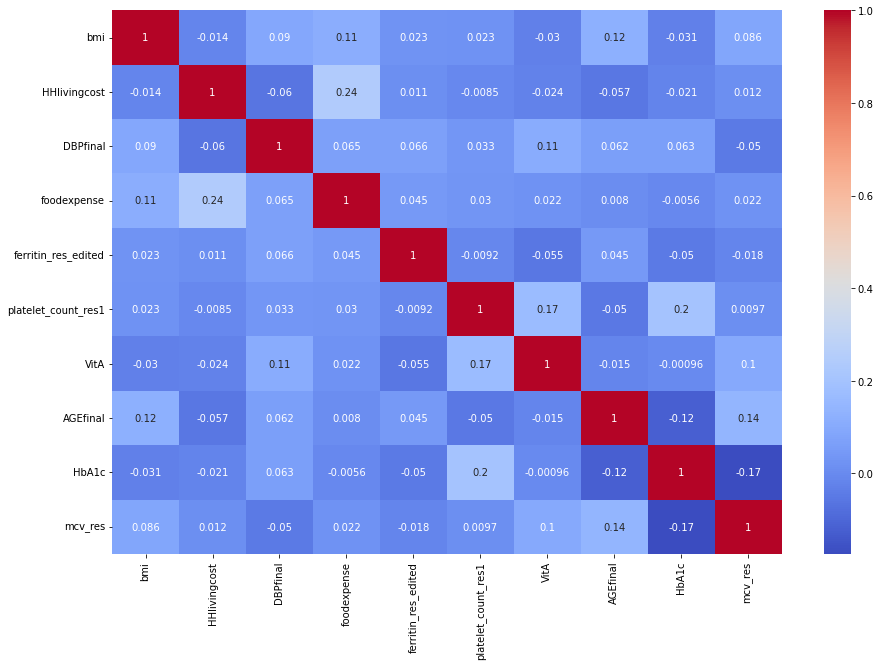

In [29]:
corr_ex = df[["bmi", "HHlivingcost", "DBPfinal", "foodexpense", "ferritin_res_edited", 
   "platelet_count_res1", "VitA", "AGEfinal", "HbA1c","mcv_res"]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_ex, cmap="coolwarm", annot = True)
plt.show()

The following features are the top performing features in the ExtraTrees Classifer :"bmi", "HHlivingcost", "DBPfinal", "foodexpense", "ferritin_res_edited", "platelet_count_res1", "VitA", "AGEfinal", "HbA1c","mcv_res".

The correlation between the features clearly shows that the feature were not correlated

Text(0.5, 15.0, 'Predicted Label')

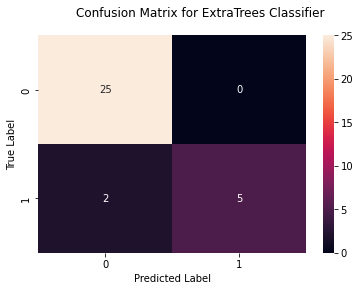

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
prediction_ex = extra.predict(X_test)
cm_extra = confusion_matrix(y_test, prediction_ex)
sns.heatmap(cm_extra, annot=True)
#disp = ConfusionMatrixDisplay(cm_extra, display_labels=cm_extra.classes)
plt.suptitle("Confusion Matrix for ExtraTrees Classifier")
plt.ylabel ("True Label")
plt.xlabel ("Predicted Label")

Catboost Classifier

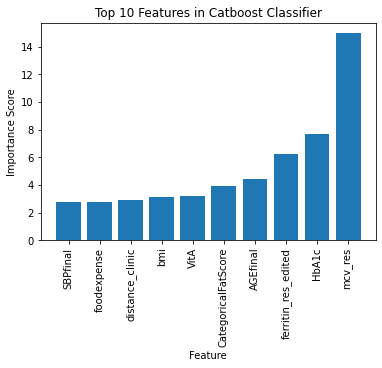

In [31]:
# Building the model
cat = CatBoostClassifier(random_state = 123, silent=True)
# Training the model
cat.fit(X_train, y_train)

# get feature importance scores from the trained model
importances = cat.feature_importances_

# get the top 10 features with the highest importance scores
indices = np.argsort(importances)[-10:]

# plot the feature importance scores in a bar chart
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), [X.columns[i] for i in indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Top 10 Features in Catboost Classifier")
plt.show()

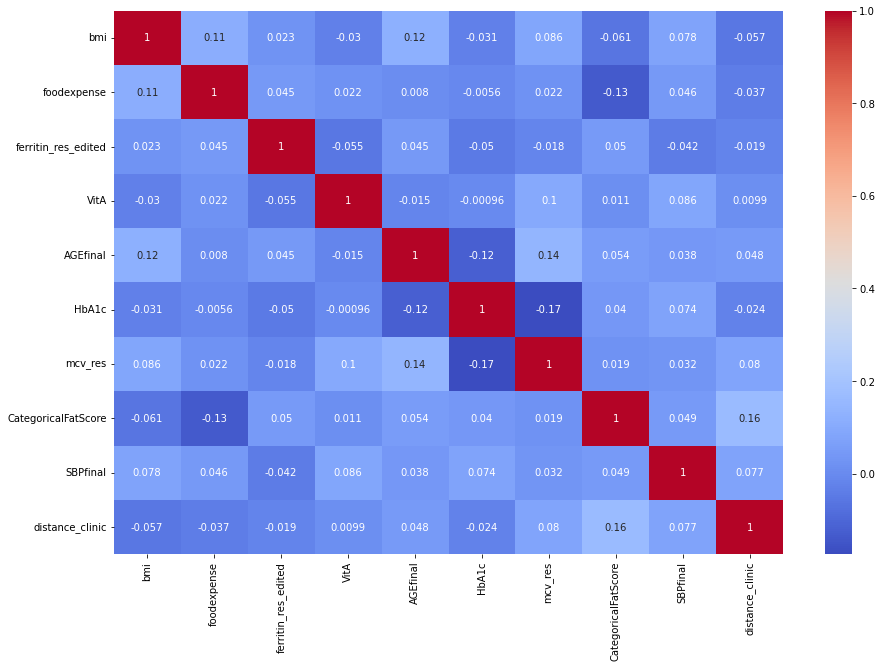

In [32]:
corr_cat = df[["bmi", "foodexpense", "ferritin_res_edited", "VitA", "AGEfinal", "HbA1c","mcv_res",
               "CategoricalFatScore", "SBPfinal", "distance_clinic"]].corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_cat, cmap="coolwarm", annot = True)
plt.show()

The following features are the top performing features in the CatBoost Classifier Classifer: "bmi", "foodexpense", "ferritin_res_edited", "VitA", "AGEfinal", "HbA1c","mcv_res",
               "CategoricalFatScore", "SBPfinal", "distance_clinic"

The correlation between the features clearly shows that the feature were not correlated

Text(0.5, 15.0, 'Predicted Label')

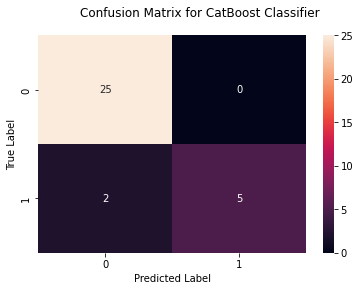

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
prediction_cat = cat.predict(X_test)
cm_cat = confusion_matrix(y_test, prediction_ex)
sns.heatmap(cm_cat, annot=True)
plt.suptitle("Confusion Matrix for CatBoost Classifier")
plt.ylabel ("True Label")
plt.xlabel ("Predicted Label")

# ROC AUC CURVE FOR TOP SCORES

In [34]:
classifiers = [ExtraTreesClassifier(random_state = 123, n_estimators = 150, criterion = "entropy"),#(criterion = 'entropy', max_depth = 8, max_features = 'log2', min_samples_leaf = 1, n_estimators = 150, random_state = 123)),
              (SVC(random_state=123, probability = True)), #(,gamma=1, C = 100,probability = True)),
              (BaggingClassifier(random_state=123)), #base_estimator=RandomForestClassifier))) #n_estimators = 250)
              (AdaBoostClassifier()), #base_estimator=DecisionTreeClassifier(),#random_state = 101,n_estimators =150 )),
              (GradientBoostingClassifier(random_state = 123)), (CatBoostClassifier(random_state = 123, silent=True))] #,n_estimators = 250))] ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [ ]:
#result_table

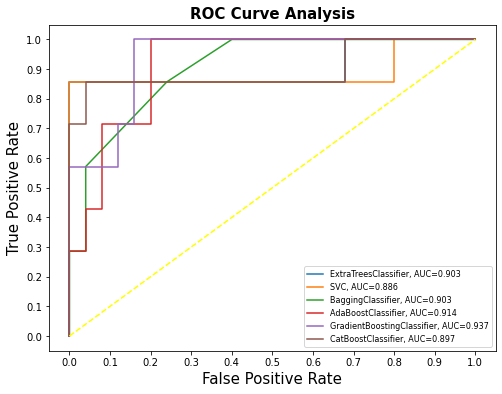

In [35]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='yellow', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':8}, loc='lower right')

plt.show()

# Plotting the Accuracy Scores

In [36]:
Accuracy_table = Store_model_results[["Model","Accuracy Score"]].sort_values(by = "Accuracy Score", ascending = False)
Accuracy_table

,Model,Accuracy Score
0,ExtraTreesClassifier,0.9375
10,CatBoostClassifier,0.90625
2,Support Vector Machines,0.875
9,Gradient Boosting,0.875
8,Adaboost Classifier,0.84375
1,Logistic Regression,0.8125
5,KNN,0.8125
7,Bagging Classifier,0.8125
6,Decision Tree,0.75
4,Bernoulli Naive Bayes,0.71875


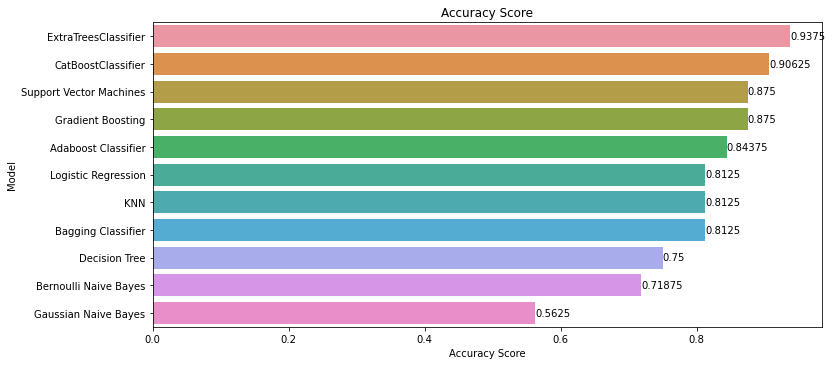

In [37]:
fig, ax = plt.subplots(figsize=(12, 22))
 
# drawing the plot
sns.barplot(y = 'Model', x = 'Accuracy Score', data = Accuracy_table).set(title="Accuracy Score")
ax.set_box_aspect(5/len(ax.patches))
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

#sns.barplot(x = 'Model', y = 'Accuracy Score', data = Accuracy_table)

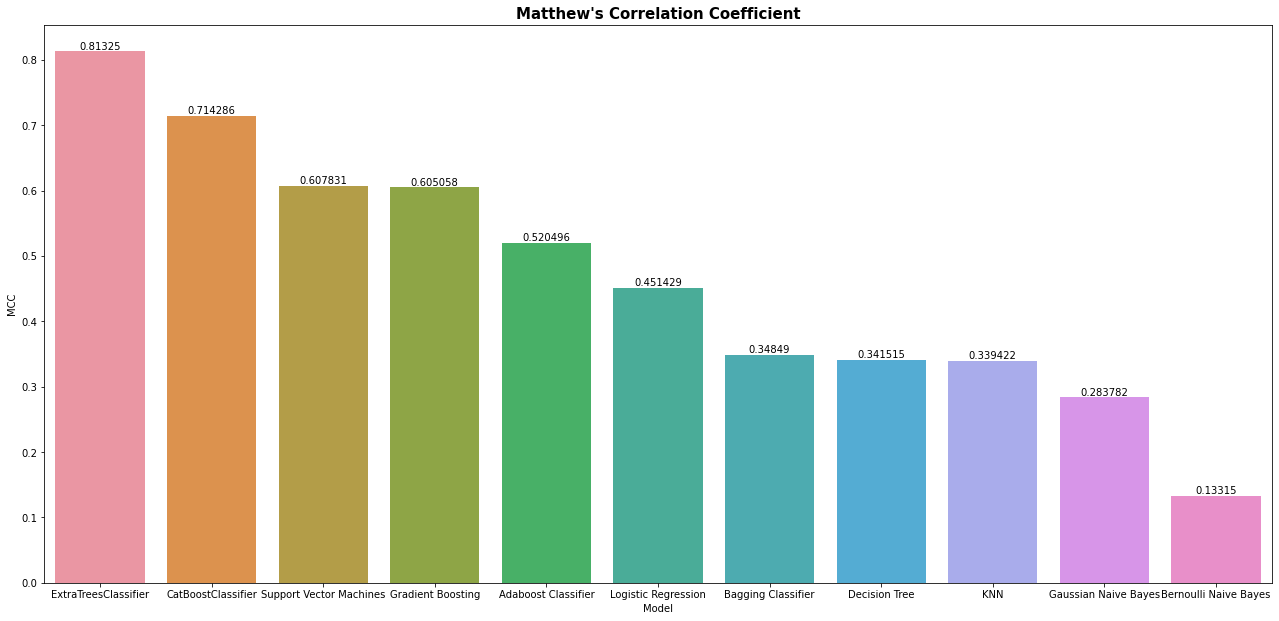

In [38]:
MCC_table = Store_model_results[["Model","MCC"]].sort_values(by = "MCC", ascending = False)
fig, ax = plt.subplots(figsize=(22, 12))
 
# drawing the plot
sns.barplot(x = 'Model', y = 'MCC', data = MCC_table)
plt.title('Matthew\'s Correlation Coefficient', fontweight='bold', fontsize=15)
ax.set_box_aspect(5/len(ax.patches))
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

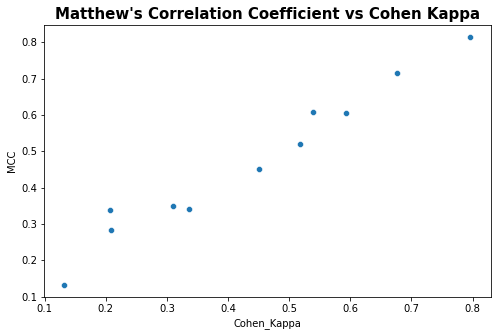

In [39]:
#Correlation between Mcc and Cohen Kappa
fig, ax = plt.subplots(figsize=(8, 5))
 
# drawing the plot
sns.scatterplot(x = Store_model_results['Cohen_Kappa'], y = Store_model_results['MCC'])
plt.title('Matthew\'s Correlation Coefficient vs Cohen Kappa', fontweight='bold', fontsize=15)
#ax.set_box_aspect(5/len(ax.patches))
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

The Matthew's Correlation Coefficient and Cohen Kappa are highly correlated
The Balanced Accuracy and Cohen Kappa are highly correlated
The Matthew's Correlation Coefficient and Balanced Accuracy are highly correlated

In [40]:
Store_model_results.corr()

,Balanced_Acc,Cohen_Kappa,MCC,Precision,Recall,Roc_Auc_score
Balanced_Acc,1.000000,0.949622,0.910722,0.443848,0.688822,0.633843
Cohen_Kappa,0.949622,1.000000,0.980675,0.662321,0.436937,0.694726
MCC,0.910722,0.980675,1.000000,0.769685,0.387863,0.694140
Precision,0.443848,0.662321,0.769685,1.000000,-0.211006,0.482116
Recall,0.688822,0.436937,0.387863,-0.211006,1.000000,0.275333
Roc_Auc_score,0.633843,0.694726,0.694140,0.482116,0.275333,1.000000


In [ ]:
#Store_model_results.corr()["Accuracy Score"].plot(kind='bar', figsize=(14, 6))